In [48]:
import matplotlib.pyplot as plt
# Compute correlation
from pathlib import Path, PurePath
import sys
import numpy as np
import matplotlib
# Find path to root folder
rootFolder = 'sounds-phd'
pathToRoot = Path().resolve()
while PurePath(pathToRoot).name != rootFolder:
    pathToRoot = pathToRoot.parent
sys.path.append(f'{pathToRoot}/01_algorithms/01_NR/02_distributed')
from danse_utilities.setup import apply_sro
%matplotlib inline
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

fs = 160000                   # sampling frequency [samples/s] (true sampling rate)
nSamples = 30               # number of samples to look at
dur = nSamples / fs                    # signal duration [s]
nSignals = 2
srosToTest = np.linspace(0,100000,nSignals)   # SRO [ppm] 
signalType = 'noise'
signalType = 'speech'

sensorToNodeTags = np.arange(1, nSignals+1)
nSamples = int(fs * dur)        # total number of samples
t = np.arange(nSamples) / fs
seed = 12345
rng = np.random.default_rng(seed)

Generate raw signals

In [49]:
import soundfile as sf
from scipy import signal as sig

if signalType == 'noise':
    x1 = rng.uniform(-.5,.5,size=(len(t),1))
elif signalType == 'speech':
    x1, fsImport = sf.read('./test_sound.wav')
    # Truncate
    x1 = x1[:int(fsImport*dur), np.newaxis]
    if fsImport != fs:
        print(f'Resampling x to {fs} samples/s.')
        x1 = sig.resample(x1, axis=0, num=int(fs * dur))
x = np.repeat(x1, nSignals, 1)


Resampling x to 160000 samples/s.


Apply SROs

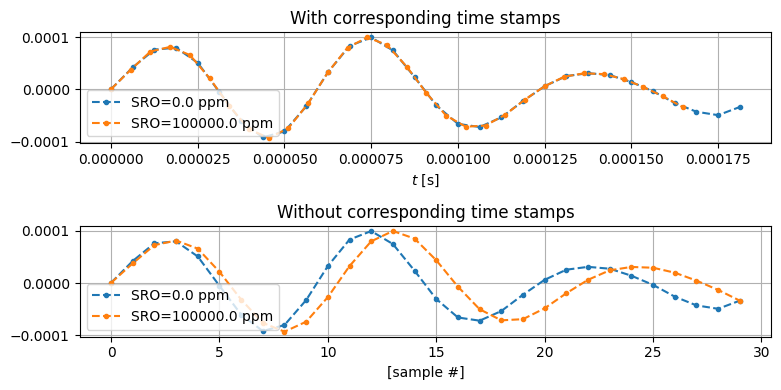

In [58]:
# APPLY SROs
x_out, t_out, fssro = apply_sro(x, fs, sensorToNodeTags, srosToTest, showSRO=False)

# Show signals
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(211)
for ii in range(x_out.shape[-1]):
    ax.plot(t_out[:,ii], x_out[:,ii], '.--', label=f'SRO={srosToTest[ii]} ppm')
ax.grid()
ax.set_xlabel('$t$ [s]')
ax.set_title('With corresponding time stamps')
plt.legend()
ax = fig.add_subplot(212)
for ii in range(x_out.shape[-1]):
    ax.plot(x_out[:,ii], '.--', label=f'SRO={srosToTest[ii]} ppm')
ax.grid()
ax.set_xlabel('[sample #]')
ax.set_title('Without corresponding time stamps')
plt.legend()
plt.tight_layout()	
plt.show()

if 0:
    fig.savefig(f'./figs/SROs/onCorrelations/waveforms_{signalType}.png')
    fig.savefig(f'./figs/SROs/onCorrelations/waveforms_{signalType}.pdf')